In [1]:
#TRABAJO FINAL
##En este trabajo lo que buscamos mostrar son metodos de aprendizaje supervisado y ver cual funciona mejor.
##Utilizaremos el dataset mushroom para este experimiento y mas que nada la variable class ya que es binaria y como veremos
##mas adelante, logra predecir mucho mejor que la variable population que tiene multiples valores. 
###Preparacion de todas las bibliotecas, sus modulos y submodulos, y algunas de sus funciones que utilizaremos.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import bokeh
import os
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sn
import chart_studio.plotly as py
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
mush = pd.read_csv('mushroom.csv')
mush['id'] = range(1, len(mush) + 1)
label_encoder = LabelEncoder()
mush_encoded = mush.apply(label_encoder.fit_transform)

In [4]:
#Dataset
###En esta linea, mostramosel dataset mushroom original con la columna id agregada.
mush

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
0,e,x,f,n,f,n,f,w,n,b,...,w,p,NaN,n,o,p,w,v,NaN,1
1,p,NaN,y,g,t,NaN,f,c,b,k,...,n,c,p,w,n,e,NaN,y,g,2
2,e,b,y,n,t,n,f,c,NaN,n,...,p,NaN,p,w,o,p,b,y,w,3
3,e,x,g,g,t,n,f,w,b,n,...,p,NaN,p,w,n,n,NaN,NaN,d,4
4,e,NaN,f,NaN,t,n,a,w,n,n,...,NaN,w,p,w,NaN,l,w,v,d,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,NaN,r,f,n,f,NaN,n,NaN,...,n,p,p,w,o,p,k,v,NaN,25982
25982,e,f,s,e,f,NaN,f,c,n,y,...,w,p,p,w,NaN,p,r,y,d,25983
25983,p,f,g,e,NaN,NaN,a,c,b,b,...,w,NaN,p,w,o,p,h,v,m,25984
25984,e,x,g,g,t,n,f,w,b,h,...,NaN,NaN,p,w,t,e,NaN,s,NaN,25985


In [90]:
###Aqui vemos el dataset modificado para que sean todos sus valores numericos. 
mush_encoded

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
0,0,5,0,4,0,5,1,1,1,0,...,7,6,1,0,1,4,7,4,7,0
1,1,6,3,3,1,9,1,0,0,4,...,4,1,0,2,0,0,9,5,1,1
2,0,0,3,4,1,5,1,0,2,5,...,6,9,0,2,1,4,0,5,6,2
3,0,5,1,3,1,5,1,1,0,5,...,6,9,0,2,0,3,9,6,0,3
4,0,6,0,10,1,5,0,1,1,5,...,9,7,0,2,3,2,7,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,0,2,4,6,0,5,1,2,1,12,...,4,6,0,2,1,4,2,4,7,25981
25982,0,2,2,2,0,9,1,0,1,11,...,7,6,0,2,3,4,5,5,0,25982
25983,1,2,1,2,2,9,0,0,0,0,...,7,9,0,2,1,4,1,4,3,25983
25984,0,5,1,3,1,5,1,1,0,3,...,9,9,0,2,2,0,9,3,7,25984


In [86]:
###Aqui con el metodo describe vemos datos estadisticos del dataset.
mush_encoded.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
count,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,...,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000,25986.000000
mean,0.447626,3.414800,1.998114,5.209074,0.657931,4.747710,0.953321,0.511545,0.595744,6.033864,...,5.649965,5.604210,0.134572,2.083776,1.308782,2.560186,4.486685,3.593127,2.736666,12992.500000
std,0.497259,1.880803,1.367240,3.120868,0.701639,2.722931,0.558950,0.715184,0.713872,4.054023,...,2.568081,2.571407,0.341273,1.029872,0.838333,1.827466,2.908415,1.713354,2.483093,7501.656384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,4.000000,4.000000,0.000000,2.000000,1.000000,1.000000,2.000000,3.000000,0.000000,6496.250000
50%,0.000000,3.000000,2.000000,4.000000,1.000000,5.000000,1.000000,0.000000,0.000000,6.000000,...,7.000000,6.000000,0.000000,2.000000,1.000000,3.000000,3.000000,4.000000,2.000000,12992.500000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,7.000000,1.000000,1.000000,1.000000,10.000000,...,7.000000,7.000000,0.000000,2.000000,2.000000,4.000000,7.000000,5.000000,5.000000,19488.750000
max,1.000000,6.000000,4.000000,10.000000,2.000000,9.000000,2.000000,2.000000,2.000000,12.000000,...,9.000000,9.000000,1.000000,4.000000,3.000000,5.000000,9.000000,6.000000,7.000000,25985.000000


In [7]:
###Esta linea muestra una regrsion logistica entre la variable independiente class_dummy y la variable dependiente poblacion.
mush['class_dummy'] = pd.get_dummies(mush['class'], drop_first=True)
model1 = sm.Logit(mush['class_dummy'], pd.get_dummies(mush['population'], drop_first=True))
lm1 = model1.fit()
print(lm1.summary())

Optimization terminated successfully.
         Current function value: 0.687036
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            class_dummy   No. Observations:                25986
Model:                          Logit   Df Residuals:                    25981
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:               0.0008942
Time:                        18:25:05   Log-Likelihood:                -17853.
converged:                       True   LL-Null:                       -17869.
Covariance Type:            nonrobust   LLR p-value:                 1.951e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c             -0.2484      0.045     -5.555      0.000      -0.336      -0.161
n             -0.3661      0.

In [9]:
###Aqui tenemos una Regresion lineal menos recomendada para este caso que es class es una variable categorica
mush_encoded = mush_encoded.rename(columns={'class': 'class_label'})
model1 = 'class_label~population'
lm1   = sn.ols(formula = model1, data = mush_encoded).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            class_label   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.368
Date:                Wed, 11 Sep 2024   Prob (F-statistic):            0.00664
Time:                        18:42:05   Log-Likelihood:                -18713.
No. Observations:               25986   AIC:                         3.743e+04
Df Residuals:                   25984   BIC:                         3.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4301      0.007     60.014      0.0

Accuracy del arbol de Decision: 1.0


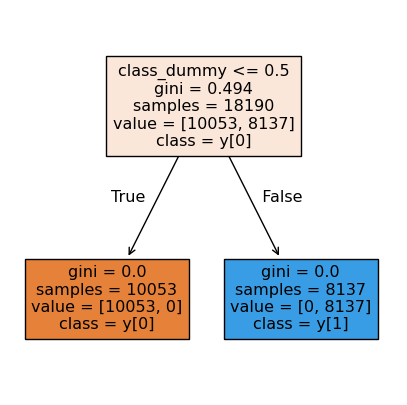

In [11]:
#ARBOL DE DECISION
###En este cuadro estamos haciendo un árbol de decisión comparando las dos clases de hongos del dataset. En el árbol al ver gini, 
###al valor ser 0.494 y muy cercano a 0.5, podemos decir que las dos clases están divididas, muy equitativamente. Value son los 
###valores que se usaron y la línea class = y[0] indica a los hongos de clase comestible y class = [1] son los hongos envenenados.
label_encoder = LabelEncoder()
mush_encoded = mush.apply(label_encoder.fit_transform)
mush_encoded = mush_encoded.rename(columns={'class': 'class_label'})
X = mush_encoded.drop(['class_label', 'id'], axis= 1)
y = mush_encoded['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del arbol de Decision: {accuracy}")
plt.figure(figsize=(5,5))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True)
plt.show()

Accuracy para k=1: 0.6503335043612108


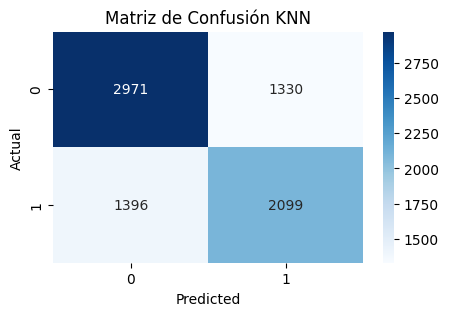

Accuracy para k=5: 0.6893278604412519


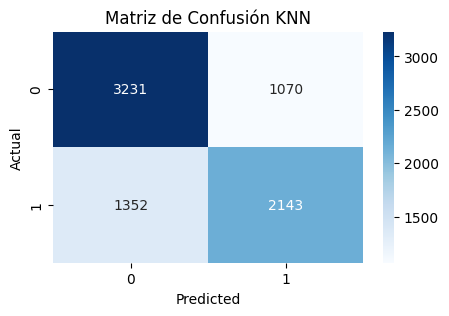

Accuracy para k=10: 0.6958696767573115


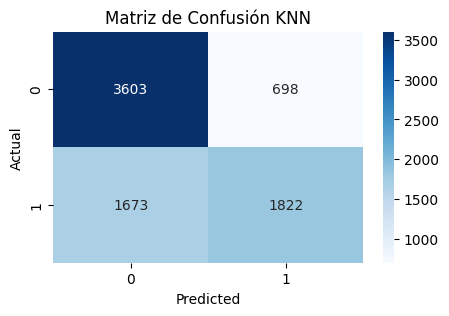

Accuracy para k=15: 0.7092098512057465


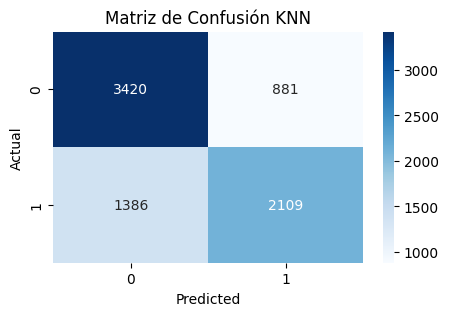

Accuracy para k=20: 0.7043355566957414


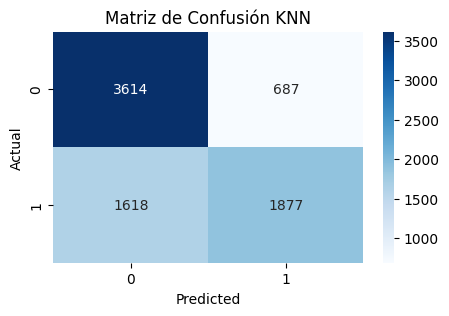

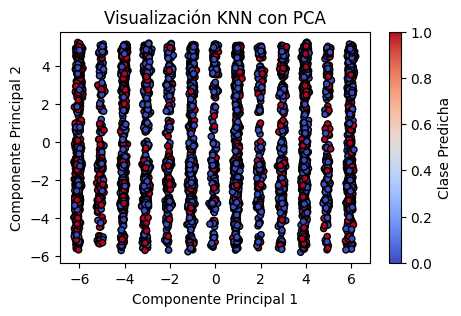

In [14]:
#MATRIZ DE CONFUSION
###Aqui hacemos una matriz de confusion y le damos distintos valores de K para analizar 
###los distintos tipos de precision dependiendo de este valor.
mush_encoded = mush.apply(label_encoder.fit_transform)
mush_encoded = mush_encoded.rename(columns={'class': 'class_label'})
X = mush_encoded.drop(['class_label', 'id'], axis=1)
y = mush_encoded['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for k in [1, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy para k={k}: {accuracy}")
    cm = confusion_matrix(y_test, y_pred)
    class_names = mush_encoded['class_label'].unique()
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión KNN')
    plt.show()

#VISUALIZACION KNN CON PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(5, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Visualización KNN con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Clase Predicha')
plt.show()

Accuracy del modelo de regresión logística: 1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4301
           1       1.00      1.00      1.00      3495

    accuracy                           1.00      7796
   macro avg       1.00      1.00      1.00      7796
weighted avg       1.00      1.00      1.00      7796

MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2: 1.0
Matriz de confusión:


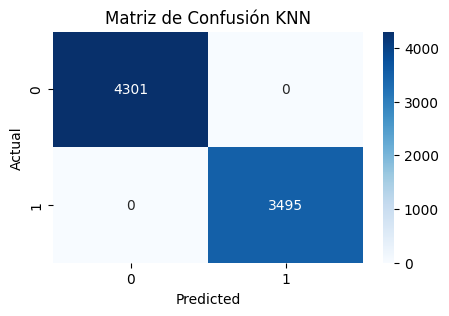

In [100]:
#REPORTE DE CLASIFICACION
###En este caso mostramos un reporte de clasificacion y una matriz de confusion KNN,
###para visualizar la calidad o precision de la prediccion
###Tambien mostramos algunas metricas para algoritmos de regresion como el Error cuadratico medio(RMSE),
###Error absoluto medio(MAE) y R-cuadradro(R2)
mush_encoded = mush_encoded.rename(columns={'class': 'class_label'})
X = mush_encoded.drop(['class_label', 'id'], axis=1)
y = mush_encoded['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de regresión logística: {accuracy}")
cm = confusion_matrix(y_test, y_pred)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred); print("R2:", r2)
print("Matriz de confusión:")
class_names = mush_encoded['class_label'].unique()
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión KNN')
plt.show()


In [ ]:
mush['population'].value_counts()

In [ ]:
Z = mush_encoded.drop(['population','id'], axis=1)
y = mush_encoded['population']
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(Z_train, y_train)
y_pred = model.predict(Z_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de regresión logística: {accuracy}")
cm = confusion_matrix(y_test, y_pred)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred); print("R2:", r2)
print("Matriz de confusión:")
class_names = mush_encoded['population'].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión KNN')
plt.show()

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(Z_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Visualización KNN con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Clase Predicha')
plt.show()

X = mush_encoded.drop(['population', 'id'], axis= 1)
y = mush_encoded['population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del arbol de Decision: {accuracy}")
plt.figure(figsize=(12,7))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True)
plt.show() 

In [15]:
label_encoder = LabelEncoder()
for column in mush.columns:
    mush[column] = label_encoder.fit_transform(mush[column])
X = mush.drop(['habitat', 'id'], axis=1)
y = mush['habitat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=4000, max_depth=15, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuaracy = accuracy_score(y_test, y_pred)
print(f"Precision del modelo: {accuaracy}")

Precision del modelo: 0.25336667949211233


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
label_encoder = LabelEncoder()
for column in mush.columns:
    mush[column] = label_encoder.fit_transform(mush[column])
X = mush.drop(['habitat', 'id'], axis=1)
y = mush['habitat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=400, max_depth=15, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuaracy = accuracy_score(y_test, y_pred)
print(f"Precision del modelo: {accuaracy}")

In [10]:
mush['habitat'].value_counts()

habitat
0    6573
1    4946
7    3484
4    3146
2    2711
5    1857
3    1708
6    1561
Name: count, dtype: int64